In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df=pd.read_csv("/content/sample_data/Algerian_forest_fires_cleaned_dataset.csv")

In [ ]:
df.drop(["Unnamed: 0","day","month","year"],axis=1,inplace=True)
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [ ]:
# Encoding categoriacal column named as "Classes" into 0 and 1 on the basis of categories "not fire" and "fire"
df["Classes"]=df["Classes"].str.strip().astype(str)
df["Classes"]=np.where(df["Classes"]=="not fire",0,1)
df["Classes"].astype(int)

,Classes
0,0
1,0
2,0
3,0
4,0
...,...
238,1
239,0
240,0
241,0


In [ ]:
df.columns

Index(['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI',
       'FWI', 'Classes', 'Region'],
      dtype='object')

In [ ]:
# Assigning Independent and dependent features to input and output variables
X=df.drop("FWI",axis=1)
y=df["FWI"]

In [ ]:
# Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((194, 11), (194,), (49, 11), (49,))

In [ ]:
# Feature Selection based on correlation
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.653725,-0.308149,-0.313112,0.690285,0.468911,0.372163,0.613138,0.446280,0.539642,0.258344
RH,-0.653725,1.000000,0.211645,0.239441,-0.649239,-0.401836,-0.220945,-0.714640,-0.346511,-0.454926,-0.408441
Ws,-0.308149,0.211645,1.000000,0.235922,-0.176596,0.004712,0.092866,-0.002300,0.037465,-0.075322,-0.202357
Rain,-0.313112,0.239441,0.235922,1.000000,-0.547864,-0.288538,-0.301110,-0.349903,-0.299179,-0.378585,-0.057382
FFMC,0.690285,-0.649239,-0.176596,-0.547864,1.000000,0.611978,0.519513,0.751819,0.598248,0.786012,0.254770
DMC,0.468911,-0.401836,0.004712,-0.288538,0.611978,1.000000,0.876122,0.679049,0.983891,0.606775,0.188980
DC,0.372163,-0.220945,0.092866,-0.301110,0.519513,0.876122,1.000000,0.512934,0.946181,0.538893,-0.083038
ISI,0.613138,-0.714640,-0.002300,-0.349903,0.751819,0.679049,0.512934,1.000000,0.637669,0.740072,0.291889
BUI,0.446280,-0.346511,0.037465,-0.299179,0.598248,0.983891,0.946181,0.637669,1.000000,0.602102,0.090326
Classes,0.539642,-0.454926,-0.075322,-0.378585,0.786012,0.606775,0.538893,0.740072,0.602102,1.000000,0.196276


In [ ]:
X_train.drop(["Ws"],axis=1,inplace=True)
X_test.drop(["Ws"],axis=1,inplace=True)

In [ ]:
# Check for Multicollinearity
# Method 1
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_df = pd.DataFrame()
vif_df["Features"] = X_train.columns
vif_df["VIF Factor"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif_df

,Features,VIF Factor
0,RH,2.763518
1,Rain,1.349483
2,DMC,4.647910
3,ISI,6.662820
4,Classes,5.596311
5,Region,2.096635


<Axes: >

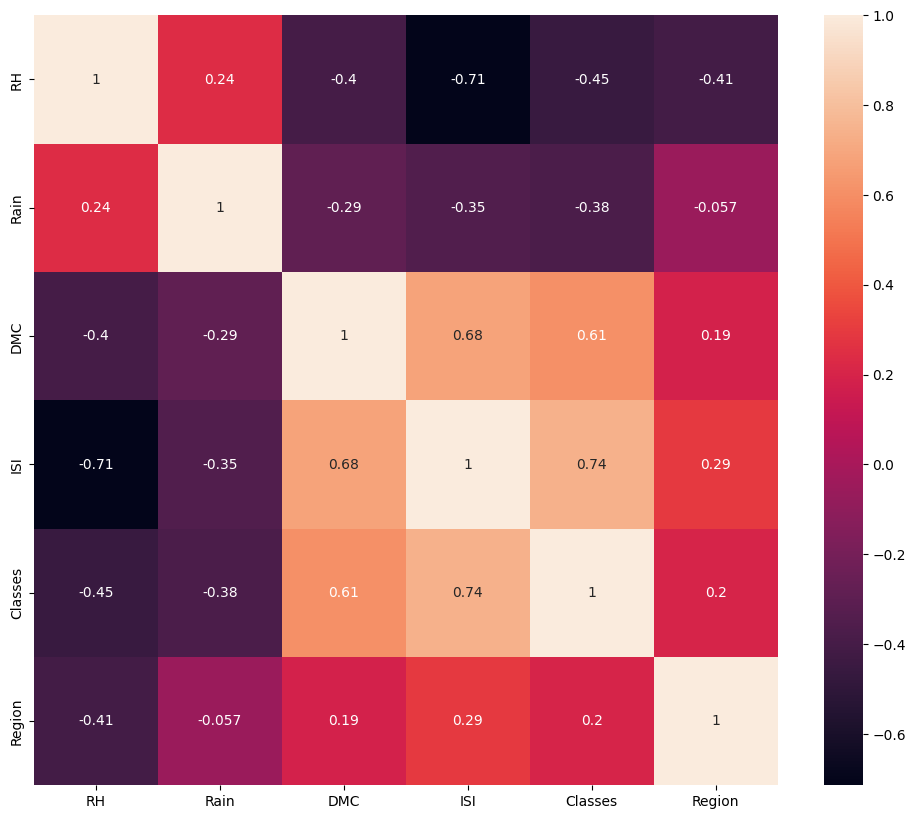

In [ ]:
# Method 2
plt.figure(figsize=(12,10))
corr = X_train.corr()
sns.heatmap(corr,annot=True)

In [ ]:
def correlation(dataset, threshold):
  col_corr = set()
  corr_matrix = dataset.corr()
  for i in range(len(corr_matrix.columns)):
    for j in range(i):
      if abs(corr_matrix.iloc[i,j]) > threshold:
        colname = corr_matrix.columns[i]
        col_corr.add(colname)
  return col_corr

In [ ]:
# Threshold will be set by domain expert
corr_features = correlation(X_train,0.85)
corr_features

set()

In [ ]:
# Feature Scaling and Standardization
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [ ]:
X_train_sc

array([[ 0.21321832, -0.09206896, -0.74341993, -0.79648833, -1.14434427,
        -1.01036297],
       [-1.65484925, -0.38015572,  3.53088931,  1.88757476,  0.8738629 ,
         0.98974332],
       [-1.25454906, -0.14008342, -0.168916  , -0.19488798,  0.8738629 ,
         0.98974332],
       ...,
       [ 0.947102  ,  3.0768854 , -1.06514213, -1.0972885 , -1.14434427,
        -1.01036297],
       [-0.18708188, -0.38015572,  0.32898741,  0.56868169,  0.8738629 ,
         0.98974332],
       [ 1.0138187 ,  0.48410456, -1.01918182, -0.88904223, -1.14434427,
        -1.01036297]])

Text(0.5, 1.0, 'X_train after scaling')

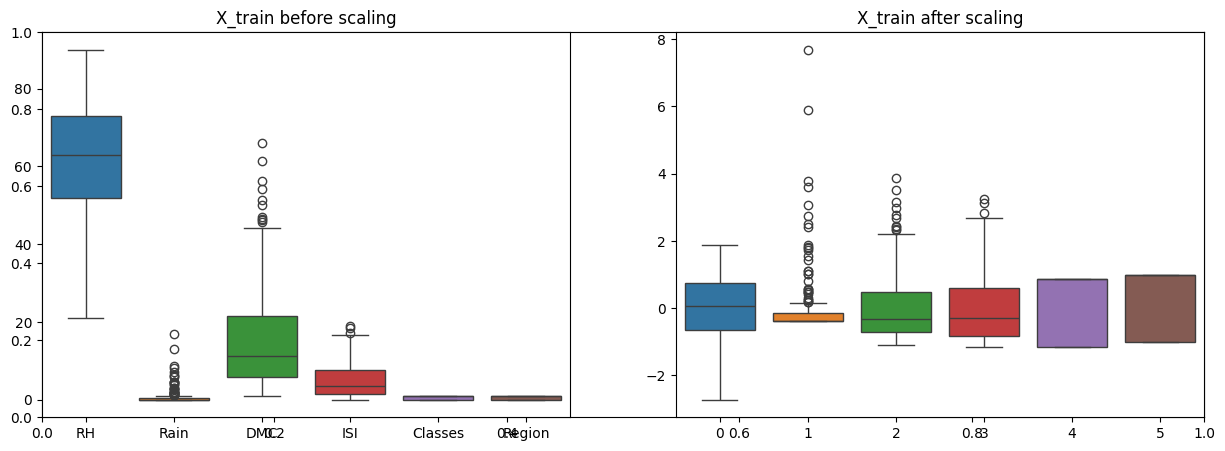

In [ ]:
# Box plot understand the effects of standard scaler
plt.subplots(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data=X_train)
plt.title("X_train before scaling")
plt.subplot(1,2,2)
sns.boxplot(data=X_train_sc)
plt.title("X_train after scaling")

MAE: 0.677105101198715
R2 Score: 0.9717620911393758


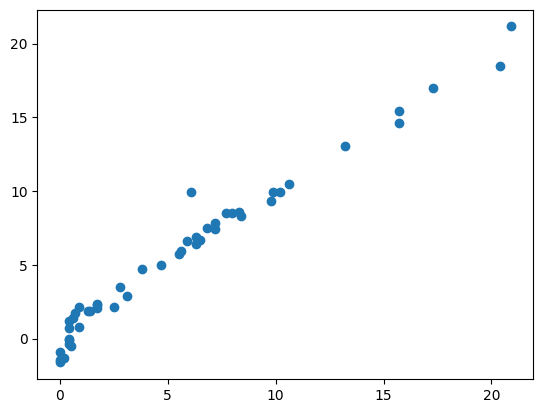

In [ ]:
# Applying Linear Regression Model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
linreg=LinearRegression()
linreg.fit(X_train_sc,y_train)
y_pred=linreg.predict(X_test_sc)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("MAE:",mae)
print("R2 Score:",score)
plt.scatter(y_test,y_pred)

MAE: 1.0093964332787382
R2 Score: 0.9430513989461938


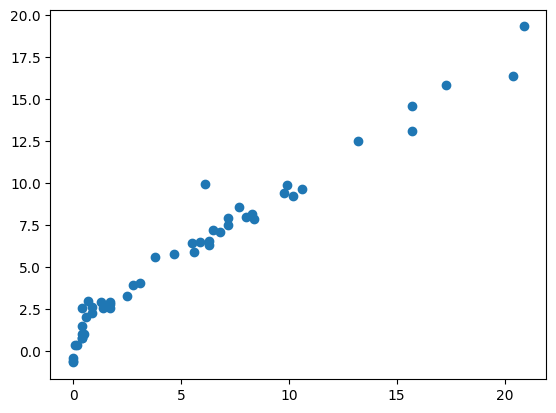

In [ ]:
# Applying Lesso Regression for the better score
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
lassoreg=Lasso()
lassoreg.fit(X_train_sc,y_train)
y_pred=lassoreg.predict(X_test_sc)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("MAE:",mae)
print("R2 Score:",score)
plt.scatter(y_test,y_pred)

In [ ]:
# Cross Validation Lasso
from sklearn.linear_model import LassoCV
lassoCV=LassoCV(cv=5)
lassoCV.fit(X_train_sc,y_train)

LassoCV(cv=5)

In [ ]:
lassoCV.alpha_

np.float64(0.10877041056083556)

In [ ]:
lassoCV.alphas_

array([7.1563667 , 6.67405153, 6.2242428 , 5.80474966, 5.41352896,
       5.04867523, 4.70841142, 4.39108025, 4.09513613, 3.81913766,
       3.56174057, 3.32169117, 3.09782031, 2.88903759, 2.69432612,
       2.51273756, 2.34338746, 2.18545099, 2.0381589 , 1.90079382,
       1.77268667, 1.65321353, 1.54179247, 1.43788081, 1.34097246,
       1.2505954 , 1.16630946, 1.08770411, 1.01439649, 0.94602956,
       0.88227033, 0.82280827, 0.76735374, 0.71563667, 0.66740515,
       0.62242428, 0.58047497, 0.5413529 , 0.50486752, 0.47084114,
       0.43910802, 0.40951361, 0.38191377, 0.35617406, 0.33216912,
       0.30978203, 0.28890376, 0.26943261, 0.25127376, 0.23433875,
       0.2185451 , 0.20381589, 0.19007938, 0.17726867, 0.16532135,
       0.15417925, 0.14378808, 0.13409725, 0.12505954, 0.11663095,
       0.10877041, 0.10143965, 0.09460296, 0.08822703, 0.08228083,
       0.07673537, 0.07156367, 0.06674052, 0.06224243, 0.0580475 ,
       0.05413529, 0.05048675, 0.04708411, 0.0439108 , 0.04095

In [ ]:
lassoCV.mse_path_

array([[68.58934997, 64.28650232, 49.25415197, 79.11474083, 38.68688171],
       [63.2664675 , 58.77362304, 43.20292636, 77.07183352, 34.66910628],
       [56.87389457, 51.79652473, 37.15764773, 69.4806422 , 31.16497557],
       [51.2737596 , 45.69461734, 31.98560721, 62.80993539, 27.46286399],
       [45.36816855, 40.35928545, 27.56726322, 56.94442062, 23.75447628],
       [39.875005  , 35.69250404, 23.79907917, 50.31847875, 20.54655878],
       [35.0794232 , 31.60885664, 20.59132915, 44.35263414, 17.77349727],
       [30.89154006, 28.0342798 , 17.86626498, 39.14265375, 15.37720198],
       [27.23334321, 24.90389594, 15.55674604, 34.59116894, 13.30754905],
       [24.03652419, 22.16129069, 13.60451947, 30.61376519, 11.52101422],
       [21.24273995, 19.75730052, 11.95924131, 27.13693185,  9.97950732],
       [18.80004176, 17.64896267, 10.57738151, 24.09623192,  8.65087048],
       [16.66356323, 15.79916526,  9.42117661, 21.43679316,  7.50627555],
       [14.79422393, 14.17520895,  8.4

MAE: 0.7362643643859498
R2 Score: 0.9667748430844599


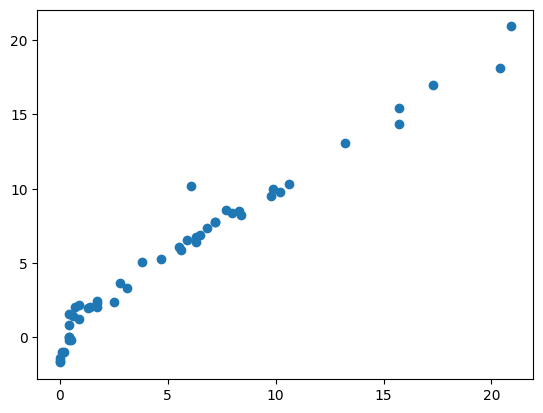

In [ ]:
y_pred=lassoCV.predict(X_test_sc)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("MAE:",mae)
print("R2 Score:",score)
plt.scatter(y_test,y_pred)

MAE: 0.6909532641245025
R2 Score: 0.9710203870461351


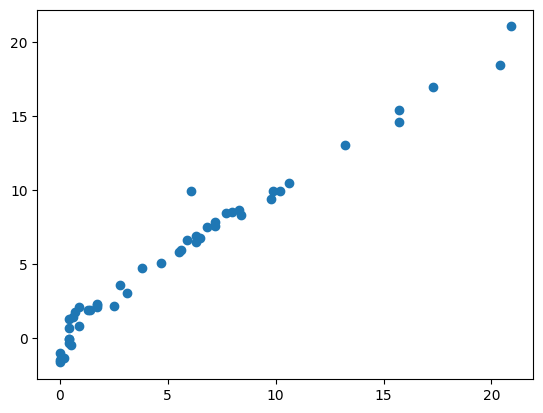

In [ ]:
# Applying Ridge Regression for the better score
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
ridgereg=Ridge()
ridgereg.fit(X_train_sc,y_train)
y_pred=ridgereg.predict(X_test_sc)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("MAE:",mae)
print("R2 Score:",score)
plt.scatter(y_test,y_pred)

In [ ]:
sc

StandardScaler()

In [ ]:
ridgereg

Ridge()

In [ ]:
import pickle
pickle.dump(sc,open("sc.pkl","wb"))
pickle.dump(ridgereg,open("ridgereg.pkl","wb"))